# Dynamic pricing

Your goal is to build a dynamic pricing model that incorporates the provided features to predict optimal fares for rides in real-time. The model must consider factors such as demand patterns and supply availability.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Importing the data
main=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FINAL PROJECT/df_2.csv", index_col=0)
backup=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FINAL PROJECT/df_2.csv", index_col=0)

In [ ]:
df=main

df.head(6)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,profit_percentage
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,-6.172840
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,41.282051
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,28.709677
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,49.118166
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,236.818182
5,59,35,Urban,Silver,83,3.51,Night,Economy,128,60.142857


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   profit_percentage        1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 85.9+ KB


In [ ]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,profit_percentage
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,83.694454
std,23.701506,19.068346,29.313774,0.435781,49.16545,88.135789
min,20.000000,5.000000,0.000000,3.500000,10.00000,-20.000000
25%,40.000000,11.000000,25.000000,3.870000,59.75000,22.925279
50%,60.000000,22.000000,51.000000,4.270000,102.00000,58.611111
75%,81.000000,38.000000,75.000000,4.632500,143.00000,125.046296
max,100.000000,89.000000,100.000000,5.000000,180.00000,517.500000


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('profit_percentage',axis=1)
y = df['profit_percentage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
df['Customer_Loyalty_Status'].unique()



array(['Silver', 'Regular', 'Gold'], dtype=object)

In [ ]:
df['Location_Category'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [ ]:
df['Time_of_Booking'].unique()

array(['Night', 'Evening', 'Afternoon', 'Morning'], dtype=object)

In [ ]:
df['Vehicle_Type'].unique()

array(['Premium', 'Economy'], dtype=object)

## Pipeline (Encoding)

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numeric_features = ['Number_of_Riders','Number_of_Drivers','Number_of_Past_Rides','Average_Ratings','Expected_Ride_Duration']
ordinal_features = ['Customer_Loyalty_Status','Vehicle_Type']
nominal_features = ['Location_Category' ,'Time_of_Booking']

In [ ]:
numeric_transformer = StandardScaler()


In [ ]:
encoder_loy = OrdinalEncoder(categories = [['Regular', 'Silver', 'Gold']])  # this is like, regular = 0, silver = 1, gold =2
encoder_veh = OrdinalEncoder(categories = [['Economy', 'Premium']])
nominal_transformer = OneHotEncoder()


In [ ]:
preprocessor = ColumnTransformer(transformers=[
                                        ('num',numeric_transformer,numeric_features),
                                        ('loyl',encoder_loy,['Customer_Loyalty_Status']),
                                        ('vehi',encoder_veh, ['Vehicle_Type']),
                                        ('nomi',nominal_transformer,nominal_features)
                                             ])

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
pipeline = Pipeline(steps = [('preprocessor', preprocessor),('regressor',DecisionTreeRegressor(random_state=42)) ])

In [ ]:
DT_model = pipeline.fit(X_train, y_train)

In [ ]:
DT_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [ ]:
y_pred_test = DT_model.predict(X_test)
y_pred_train = DT_model.predict(X_train)

# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("Random Forest w/o tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")


Random Forest w/o tuning: 

R2 Score (Test): 0.9685
R2 Score (Train): 1.0000
RMSE (Test): 14.7560
RMSE (Train):0.0000




In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'regressor__max_depth' : list(range(3,15,3)),
    'regressor__min_samples_split' : list(range(10,100,25)),
    'regressor__min_samples_leaf' : list(range(5,50,10))

}

In [ ]:
list(range(5,15,3))

[5, 8, 11, 14]

In [ ]:
DT_grid = GridSearchCV(estimator= pipeline, param_grid=params, cv=5, n_jobs=-1, verbose=1)

In [ ]:
# Fitting  GridSearchCV Object
DT_grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Number_of_Riders',
                                                                          'Number_of_Drivers',
                                                                          'Number_of_Past_Rides',
                                                                          'Average_Ratings',
                                                                          'Expected_Ride_Duration']),
                                                                        ('loyl',
                                                                         OrdinalEncoder(categories=[['Regular',
                                                                                                     'Silver',
                                                                                                     'Gold']]),
                                                                         ['Customer_Loyalty_Status']),
                                                                        ('vehi',
                                                                         OrdinalEncoder(categories=[['Economy',
                                                                                                     'Premium']]),
                                                                         ['Vehicle_Type']),
                                                                        ('nomi',
                                                                         OneHotEncoder(),
                                                                         ['Location_Category',
                                                                          'Time_of_Booking'])])),
                                       ('regressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [3, 6, 9, 12],
                         'regressor__min_samples_leaf': [5, 15, 25, 35, 45],
                         'regressor__min_samples_split': [10, 35, 60, 85]},
             verbose=1)

In [ ]:
# Get the best parameters and model from the grid search
best_params = DT_grid.best_params_
best_model = DT_grid.best_estimator_



# Print the best parameters
print("Best Parameters:", best_params)



Best Parameters: {'regressor__max_depth': 9, 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 10}


In [ ]:

# Predict on the test data using the best model
y_pred_train = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("Decision Tree with tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")


Decision Tree with tuning: 

R2 Score (Test): 0.9685
R2 Score (Train): 0.9806
RMSE (Test): 14.7560
RMSE (Train):12.4045




# Random Forest

https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/

## Creating the model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
pipeline = Pipeline(steps = [('preprocessor', preprocessor),('regressor',RandomForestRegressor(random_state=42)) ])

In [ ]:
RF_model = pipeline.fit(X_train, y_train)

In [ ]:
RF_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

# model accuracy without tuning

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [ ]:
y_pred_test = RF_model.predict(X_test)
y_pred_train = RF_model.predict(X_train)

# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("Random Forest w/o tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")


Random Forest w/o tuning: 

R2 Score (Test): 0.9775
R2 Score (Train): 0.9959
RMSE (Test): 12.4626
RMSE (Train):5.6957




## Gridsearch

In [ ]:
# @title
from sklearn.model_selection import GridSearchCV

params = {
    'regressor__n_estimators' : [50,100,150],
    'regressor__max_features' : ['sqrt',0.7,'log2'],
    'regressor__max_depth' : [5,10,15],
    'regressor__min_samples_split' : [30,50,100],
    'regressor__min_samples_leaf' : [15,25,35]

}

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'regressor__n_estimators' : list(range(100,180,20)),
    'regressor__max_features' : ['auto','sqrt',0.7],
    'regressor__max_depth' : list(range(5,15,5)),
    'regressor__min_samples_split' : list(range(10,100,50)),
    'regressor__min_samples_leaf' : list(range(5,50,10))

}

In [ ]:
RF_grid = GridSearchCV(estimator= pipeline, param_grid=params, cv=5, n_jobs=-1, verbose=1)

In [ ]:
# Fitting  GridSearchCV Object
RF_grid.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Number_of_Riders',
                                                                          'Number_of_Drivers',
                                                                          'Number_of_Past_Rides',
                                                                          'Average_Ratings',
                                                                          'Expected_Ride_Duration']),
                                                                        ('loyl',
                                                                         OrdinalEncoder(categories=[['Regular',
                                                                                                     'Silver',
                                                                                                     'Gold']]),
                                                                         ['Customer_Loyalty_Status']),
                                                                        ('vehi',
                                                                         OrdinalEncoder(categorie...
                                                                         OneHotEncoder(),
                                                                         ['Location_Category',
                                                                          'Time_of_Booking'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [5, 10],
                         'regressor__max_features': ['auto', 'sqrt', 0.7],
                         'regressor__min_samples_leaf': [5, 15, 25, 35, 45],
                         'regressor__min_samples_split': [10, 60],
                         'regressor__n_estimators': [100, 120, 140, 160]},
             verbose=1)

## best parameters

In [ ]:
# Get the best parameters and model from the grid search
best_params = RF_grid.best_params_
best_model = RF_grid.best_estimator_



# Print the best parameters
print("Best Parameters:", best_params)



Best Parameters: {'regressor__max_depth': 10, 'regressor__max_features': 'auto', 'regressor__min_samples_leaf': 5, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}


## model performance after tuning

In [ ]:

# Predict on the test data using the best model
y_pred_train = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("Random Forest with tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")


Random Forest with tuning: 

R2 Score (Test): 0.9685
R2 Score (Train): 0.9821
RMSE (Test): 14.7560
RMSE (Train):11.9325




# feature importance

In [ ]:

final_estimator = best_model.named_steps['regressor']

feature_importances = final_estimator.feature_importances_

# Get feature names
numeric_features = ['Number_of_Riders','Number_of_Drivers','Number_of_Past_Rides','Average_Ratings','Expected_Ride_Duration']
ordinal_features = ['Customer_Loyalty_Status','Vehicle_Type']
nominal_features = ['Location_Category' ,'Time_of_Booking']

feature_names = numeric_features + ordinal_features + list(preprocessor.named_transformers_['nomi'].get_feature_names_out(nominal_features))



In [ ]:
feature_importances = final_estimator.feature_importances_
print(feature_importances)

In [ ]:
feature_importance_df = pd.DataFrame({
    "Variable": feature_names,
    "Importance": final_estimator.feature_importances_
})

feature_importance_df.sort_values(by="Importance", ascending=False)

,Variable,Importance
1,Number_of_Drivers,0.622875
0,Number_of_Riders,0.368275
2,Number_of_Past_Rides,0.002997
3,Average_Ratings,0.002301
4,Expected_Ride_Duration,0.001201
6,Vehicle_Type,0.000590
5,Customer_Loyalty_Status,0.000460
10,Time_of_Booking_Afternoon,0.000394
7,Location_Category_Rural,0.000344
13,Time_of_Booking_Night,0.000195


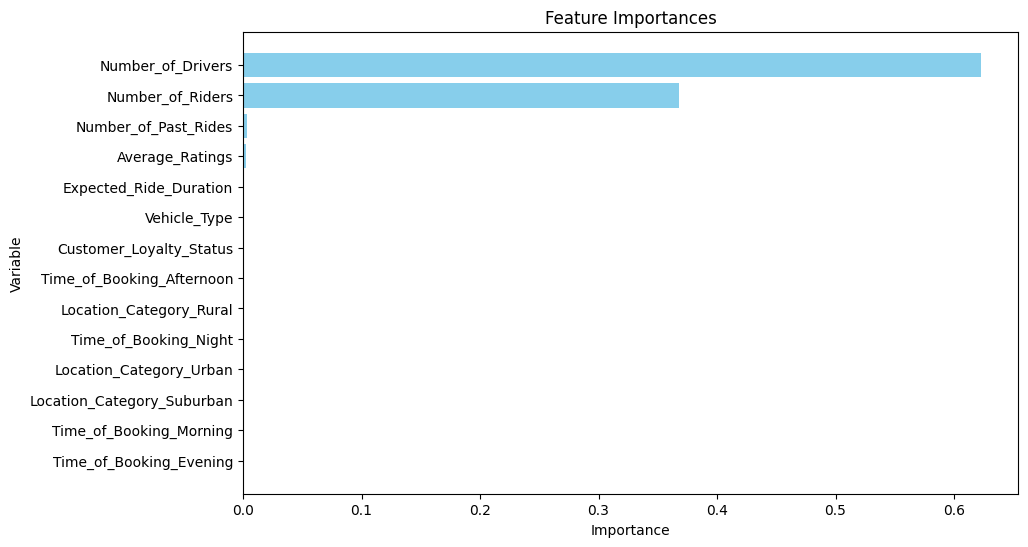

In [ ]:
import matplotlib.pyplot as plt

FI_df_sorted = feature_importance_df.sort_values(by="Importance", ascending=True)
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh("Variable", "Importance",data = FI_df_sorted, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Feature Importances')

plt.show()


# Gradient Boosting - XGB
### It uses parallel computation in which multiple decision trees are trained in parallel to find the final prediction.



https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective.

## Creating the model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
pipeline = Pipeline(steps = [('preprocessor', preprocessor),('regressor',GradientBoostingRegressor(random_state = 10)) ])

In [ ]:
XG_model = pipeline.fit(X_train, y_train)

In [ ]:
XG_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('regressor', GradientBoostingRegressor(random_state=10))])

# model accuracy without tuning

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred_test = XG_model.predict(X_test)
y_pred_train = XG_model.predict(X_train)

# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("XGB w/o tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")


XGB w/o tuning: 

R2 Score (Test): 0.9871
R2 Score (Train): 0.9902
RMSE (Test): 9.4328
RMSE (Train):8.8098




## tuning


In [ ]:

params = {
    'regressor__learning_rate' : [0.1,0.15],
    'regressor__n_estimators' : [100,150,250],
    'regressor__max_features' : ['sqrt',0.7],
    'regressor__max_depth' : [5,10],
    'regressor__min_samples_split' : [100,150,200],
    'regressor__min_samples_leaf' : [10,50,70]

}

In [ ]:
XG_grid = GridSearchCV(estimator= pipeline, param_grid=params, cv=5, n_jobs=-1, verbose=1)

In [ ]:
# Fitting  GridSearchCV Object
XG_grid.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Number_of_Riders',
                                                                          'Number_of_Drivers',
                                                                          'Number_of_Past_Rides',
                                                                          'Average_Ratings',
                                                                          'Expected_Ride_Duration']),
                                                                        ('loyl',
                                                                         OrdinalEncoder(categories=[['Regular',
                                                                                                     'Silver',
                                                                                                     'Gold']]),
                                                                         ['Customer_Loyalty_Status']),
                                                                        ('vehi',
                                                                         OrdinalEncoder(categorie...
                                                                         ['Location_Category',
                                                                          'Time_of_Booking'])])),
                                       ('regressor',
                                        GradientBoostingRegressor(random_state=10))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.1, 0.15],
                         'regressor__max_depth': [5, 10],
                         'regressor__max_features': ['sqrt', 0.7],
                         'regressor__min_samples_leaf': [10, 50, 70],
                         'regressor__min_samples_split': [100, 150, 200],
                         'regressor__n_estimators': [100, 150, 250]},
             verbose=1)

## best parameters

In [ ]:
# Get the best parameters and model from the grid search
best_params = XG_grid.best_params_
best_model = XG_grid.best_estimator_



# Print the best parameters
print("Best Parameters:", best_params)



Best Parameters: {'regressor__learning_rate': 0.15, 'regressor__max_depth': 10, 'regressor__max_features': 0.7, 'regressor__min_samples_leaf': 10, 'regressor__min_samples_split': 200, 'regressor__n_estimators': 250}


## model performance after tuning

In [ ]:

# Predict on the test data using the best model
y_pred_train = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("XGB with tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")


XGB with tuning: 

R2 Score (Test): 0.9775
R2 Score (Train): 0.9976
RMSE (Test): 12.4626
RMSE (Train):4.3987




# **Best Model**

the best model is XGB without tuning. with ;

 R2 Score (Test): 0.9871

R2 Score (Train): 0.9902

RMSE (Test): 9.4328

RMSE (Train):8.8098

In [ ]:
best_estimator =  XG_model.named_steps['regressor']
best_estimator

GradientBoostingRegressor(random_state=10)

# feature importance for best model --> XGB w/o tuning

In [ ]:


feature_importances = best_estimator.feature_importances_

# Get feature names
numeric_features = ['Number_of_Riders','Number_of_Drivers','Number_of_Past_Rides','Average_Ratings','Expected_Ride_Duration']
ordinal_features = ['Customer_Loyalty_Status','Vehicle_Type']
nominal_features = ['Location_Category' ,'Time_of_Booking']

feature_names = numeric_features + ordinal_features + list(preprocessor.named_transformers_['nomi'].get_feature_names_out(nominal_features))



In [ ]:
feature_importances = best_estimator.feature_importances_
print(feature_importances)

[3.74722050e-01 6.21125449e-01 6.42914430e-04 6.04711929e-04
 2.90506568e-04 3.73360817e-04 1.27654291e-05 1.70972980e-04
 1.89186988e-03 1.48425078e-07 1.65249981e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [ ]:
feature_importance_df = pd.DataFrame({
    "Variable": feature_names,
    "Importance": best_estimator.feature_importances_
})

FI_df_sorted_desc = feature_importance_df.sort_values(by="Importance", ascending=False)

In [ ]:
FI_df_sorted_desc

,Variable,Importance
1,Number_of_Drivers,6.211254e-01
0,Number_of_Riders,3.747221e-01
8,Location_Category_Suburban,1.891870e-03
2,Number_of_Past_Rides,6.429144e-04
3,Average_Ratings,6.047119e-04
5,Customer_Loyalty_Status,3.733608e-04
4,Expected_Ride_Duration,2.905066e-04
7,Location_Category_Rural,1.709730e-04
10,Time_of_Booking_Afternoon,1.652500e-04
6,Vehicle_Type,1.276543e-05


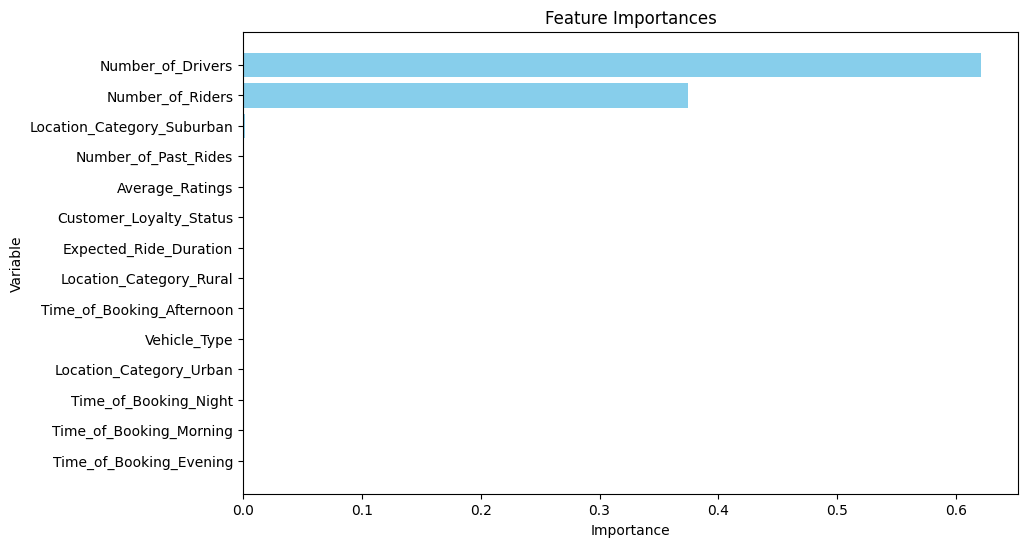

In [ ]:
import matplotlib.pyplot as plt

FI_df_sorted = feature_importance_df.sort_values(by="Importance", ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh("Variable", "Importance",data = FI_df_sorted, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.title('Feature Importances')

plt.show()


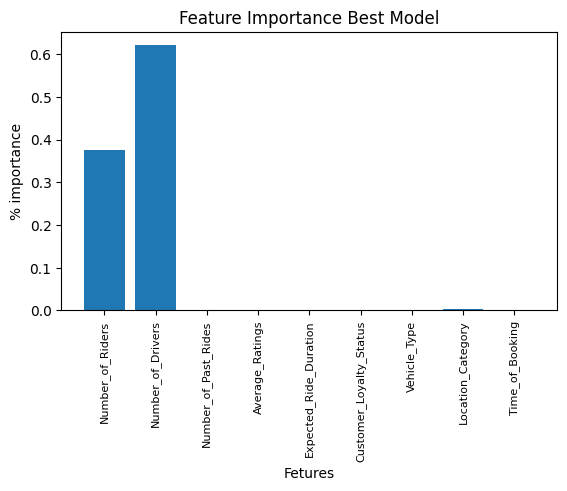

In [ ]:
column_headers=['Number_of_Riders','Number_of_Drivers','Number_of_Past_Rides','Average_Ratings','Expected_Ride_Duration','Customer_Loyalty_Status','Vehicle_Type','Location_Category','Time_of_Booking']
importance=[feature_importances[0],feature_importances[1],feature_importances[2],feature_importances[3],feature_importances[4],feature_importances[5],feature_importances[6],sum(feature_importances[7:10]),sum(feature_importances[10:14])]
important = pd.DataFrame({'name':column_headers, 'y':importance})
important
plt.subplots()
plt.subplots_adjust(bottom=0.3)
plt.bar(important.name, important.y )
plt.xticks(rotation='vertical',fontsize=8)
plt.xlabel('Fetures')
plt.ylabel('% importance')
plt.title('Feature Importance Best Model')
plt.show()

# Refitting the XGB model only using important variables

In [ ]:
important

,name,y
0,Number_of_Riders,0.374722
1,Number_of_Drivers,0.621125
2,Number_of_Past_Rides,0.000643
3,Average_Ratings,0.000605
4,Expected_Ride_Duration,0.000291
5,Customer_Loyalty_Status,0.000373
6,Vehicle_Type,0.000013
7,Location_Category,0.002063
8,Time_of_Booking,0.000165


In [ ]:
X_train

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration
687,51,25,Rural,Regular,21,4.43,Evening,Premium,38
500,21,9,Suburban,Gold,13,4.01,Evening,Economy,127
332,100,66,Suburban,Gold,27,3.53,Evening,Premium,106
979,79,29,Rural,Silver,29,4.22,Night,Economy,99
817,27,8,Rural,Gold,48,4.18,Afternoon,Economy,167
...,...,...,...,...,...,...,...,...,...
835,35,21,Suburban,Silver,13,4.14,Morning,Premium,36
192,65,10,Urban,Regular,77,4.36,Afternoon,Economy,170
629,57,40,Urban,Regular,78,3.62,Afternoon,Economy,171
559,75,56,Urban,Regular,66,3.69,Evening,Premium,22


In [ ]:
#dropping unwanted columns
columns_to_drop = ['Customer_Loyalty_Status','Number_of_Past_Rides','Average_Ratings','Time_of_Booking','Vehicle_Type','Expected_Ride_Duration','Location_Category']
X_train_up = X_train.drop(columns=columns_to_drop, axis=1)

In [ ]:
numeric_features1 = ['Number_of_Riders','Number_of_Drivers']
nominal_transformer = OneHotEncoder()

In [ ]:
preprocessor1 = ColumnTransformer(transformers=[
                                        ('num',numeric_transformer,numeric_features1)
                                       ])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
pipeline = Pipeline(steps = [('preprocessor', preprocessor1),('regressor',GradientBoostingRegressor(random_state = 10)) ])

In [ ]:
XG_model1 = pipeline.fit(X_train_up, y_train)

In [ ]:
#dropping unwanted columns
columns_to_drop = ['Customer_Loyalty_Status','Number_of_Past_Rides','Average_Ratings','Time_of_Booking','Vehicle_Type','Expected_Ride_Duration','Location_Category']
X_test_up = X_test.drop(columns=columns_to_drop, axis=1)

In [ ]:
y_pred_test1 = XG_model1.predict(X_test_up)
y_pred_train1 = XG_model1.predict(X_train_up)

# Evaluate the model

# Calculate R2 scores
r2_score_test1 = r2_score(y_test, y_pred_test1)
r2_score_train1 = r2_score(y_train, y_pred_train1)

# Calculate mean squared error
mse_test1 = mean_squared_error(y_test, y_pred_test1)
mse_train1 = mean_squared_error(y_train, y_pred_train1)

# Print the evaluation metrics
print("XGB w/o tuning updated: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")


XGB w/o tuning updated: 

R2 Score (Test): 0.9893
R2 Score (Train): 0.9898
RMSE (Test): 8.6142
RMSE (Train):8.9990




In [ ]:
XG_model11 =  XG_model1.named_steps['regressor']
XG_model11

GradientBoostingRegressor(random_state=10)

In [ ]:
feature_importances1 = XG_model11.feature_importances_


feature_names1 = numeric_features1



In [ ]:
feature_importances1 = XG_model11.feature_importances_
print(feature_importances1)

[0.38040183 0.61959817]


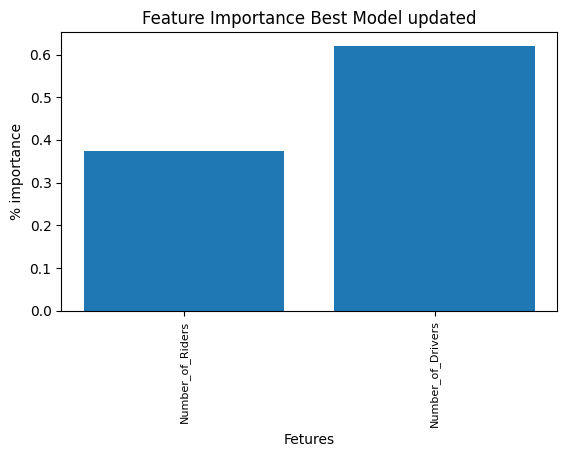

In [ ]:
column_headers1=['Number_of_Riders','Number_of_Drivers']
importance1=[feature_importances[0],feature_importances[1]]
important1 = pd.DataFrame({'name':column_headers1, 'y':importance1})
important1
plt.subplots()
plt.subplots_adjust(bottom=0.3)
plt.bar(important1.name, important1.y )
plt.xticks(rotation='vertical',fontsize=8)
plt.xlabel('Fetures')
plt.ylabel('% importance')
plt.title('Feature Importance Best Model updated')
plt.show()

In [ ]:
a=[46,67]
m=pd.DataFrame(columns=['Number_of_Riders', 'Number_of_Drivers'])
m = pd.concat([m,pd.DataFrame([a],columns=['Number_of_Riders', 'Number_of_Drivers'])], ignore_index=True)
m

,Number_of_Riders,Number_of_Drivers
0,46,67


In [ ]:
X_train_up

,Number_of_Riders,Number_of_Drivers
687,51,25
500,21,9
332,100,66
979,79,29
817,27,8
...,...,...
835,35,21
192,65,10
629,57,40
559,75,56


In [ ]:
XG_model1.predict(m)

array([14.18945323])

### partial dependdencies updated model

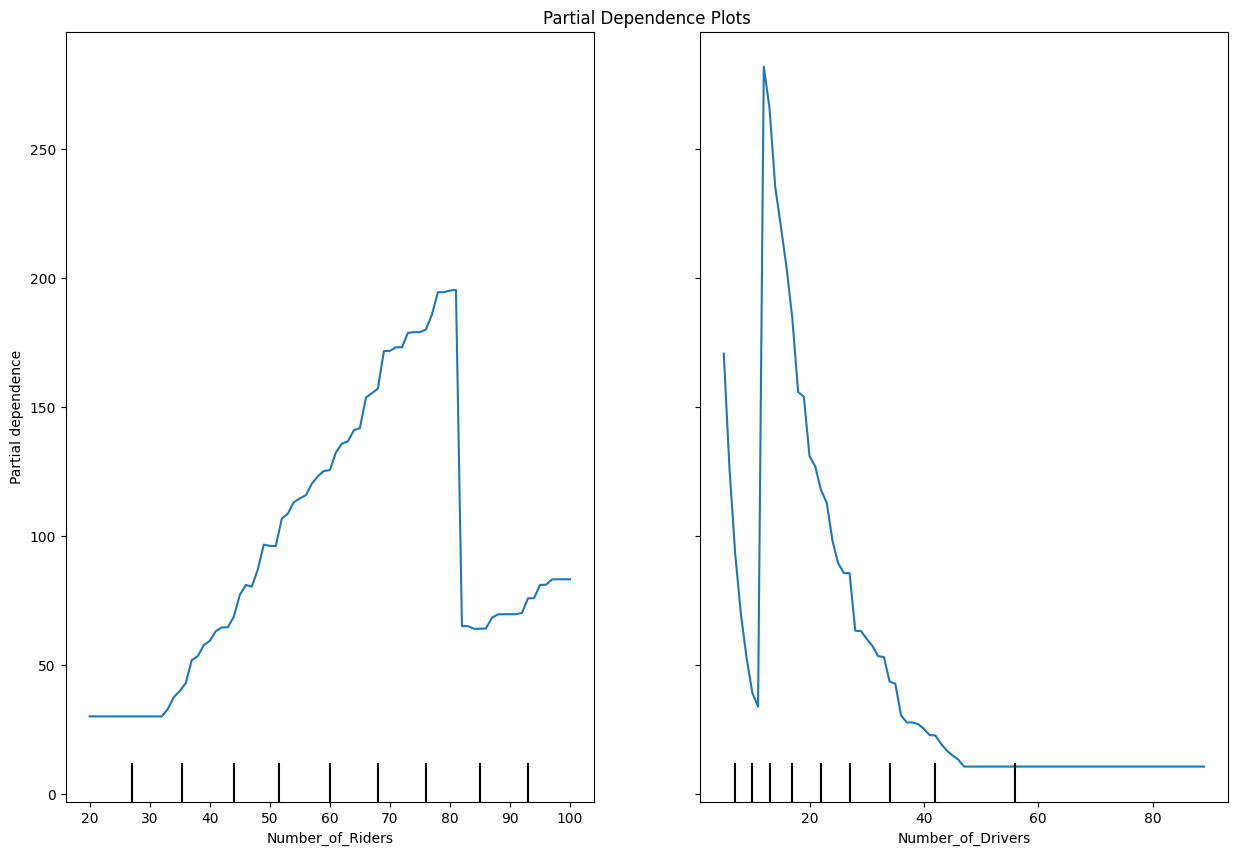

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=XG_model1,
    X=X_train,
    features=[0, 1],
    random_state=5,
    ax=ax,
    )
plt.show()

# Partial Dependancies

https://www.blog.trainindata.com/partial-dependence-plots-with-python/

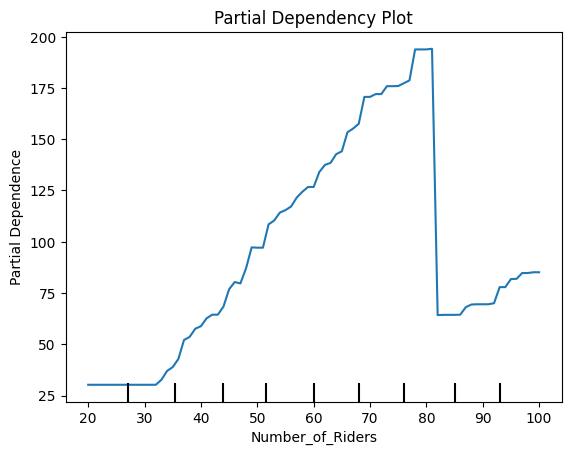

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

feature_index = 0

# Plot Partial Dependency Plot
fig, ax = plt.subplots()
PartialDependenceDisplay.from_estimator(XG_model, X_train, features=[feature_index], ax=ax)
plt.xlabel(feature_names[feature_index])
plt.ylabel('Partial Dependence')
plt.title('Partial Dependency Plot')
plt.show()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 687 to 684
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         800 non-null    int64  
 1   Number_of_Drivers        800 non-null    int64  
 2   Location_Category        800 non-null    object 
 3   Customer_Loyalty_Status  800 non-null    object 
 4   Number_of_Past_Rides     800 non-null    int64  
 5   Average_Ratings          800 non-null    float64
 6   Time_of_Booking          800 non-null    object 
 7   Vehicle_Type             800 non-null    object 
 8   Expected_Ride_Duration   800 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.5+ KB


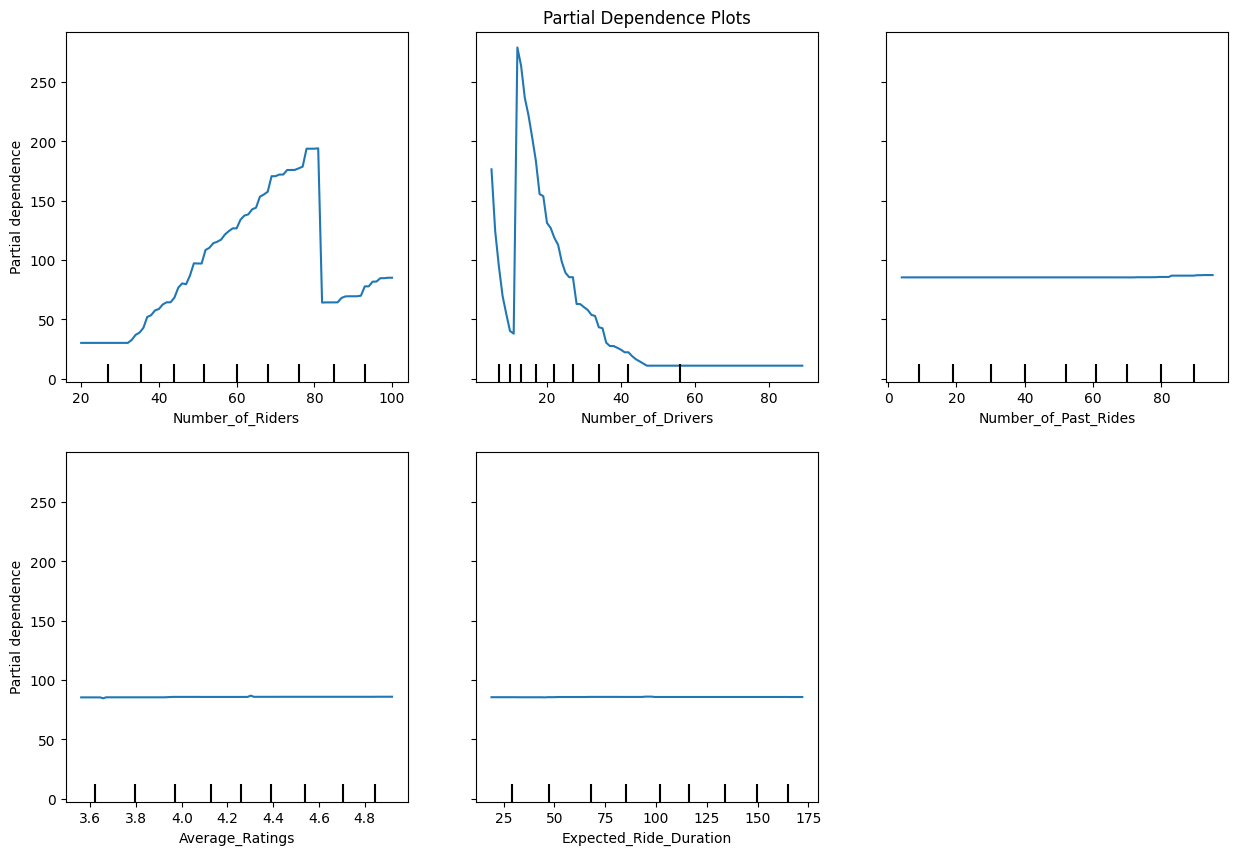

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=XG_model,
    X=X_train,
    features=[0, 1, 4, 5, 8],
    random_state=5,
    ax=ax,
    )
plt.show()

# SVM

## Creating the model

In [ ]:
from sklearn.svm import SVR
pipeline = Pipeline(steps = [('preprocessor', preprocessor),('regressor',SVR()) ])

In [ ]:
SV_model = pipeline.fit(X_train, y_train)

In [ ]:
SV_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Number_of_Riders',
                                                   'Number_of_Drivers',
                                                   'Number_of_Past_Rides',
                                                   'Average_Ratings',
                                                   'Expected_Ride_Duration']),
                                                 ('loyl',
                                                  OrdinalEncoder(categories=[['Regular',
                                                                              'Silver',
                                                                              'Gold']]),
                                                  ['Customer_Loyalty_Status']),
                                                 ('vehi',
                                                  OrdinalEncoder(categories=[['Economy',
                                                                              'Premium']]),
                                                  ['Vehicle_Type']),
                                                 ('nomi', OneHotEncoder(),
                                                  ['Location_Category',
                                                   'Time_of_Booking'])])),
                ('regressor', SVR())])

# model accuracy without tuning

In [ ]:
y_pred_test = SV_model.predict(X_test)
y_pred_train = SV_model.predict(X_train)

# Evaluate the model

# Calculate R2 scores
r2_score_test = r2_score(y_test, y_pred_test)
r2_score_train = r2_score(y_train, y_pred_train)

# Calculate mean squared error
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

# Print the evaluation metrics
print("SVM w/o tuning: \n")
print(f"R2 Score (Test): {r2_score_test:.4f}")
print(f"R2 Score (Train): {r2_score_train:.4f}")
print(f"RMSE (Test): {np.sqrt(mse_test):.4f}")
print(f"RMSE (Train):{np.sqrt( mse_train):.4f}")
print("\n")

SVM w/o tuning: 

R2 Score (Test): 0.1272
R2 Score (Train): 0.1012
RMSE (Test): 77.6813
RMSE (Train):84.5347




# model save

In [ ]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(XG_model1, file)

In [ ]:
from google.colab import files
#files.download('predictor.pickle')